## Gaussian Mixture Model for generating MNIST data

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Loading data

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

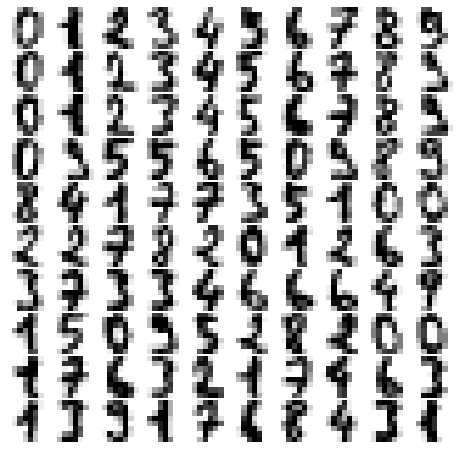

In [33]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [34]:
# use a straightforward PCA, asking it to preserve 99% of the variance in the projected data
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

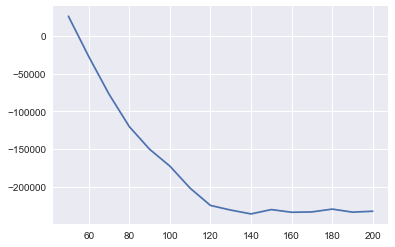

In [20]:
# Use of AIC to get a gauge of number of GMM components to use
from sklearn.mixture import GaussianMixture

n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [21]:
# Use of 110 as components number
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [25]:
# Generate new data
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

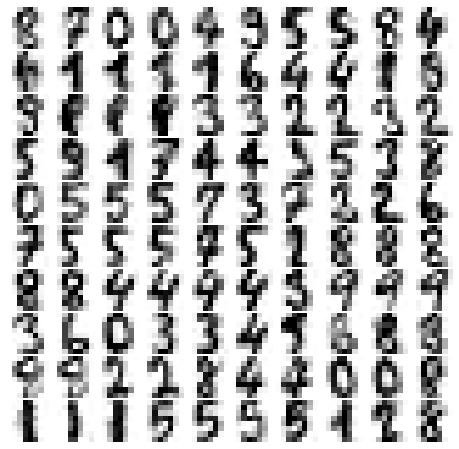

In [30]:
# use the inverse transform of the PCA object to construct the new digits
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)